Построить рекомендации (регрессия, предсказываем оценку) на фичах:
- TF-IDF на тегах и жанрах
- Средние оценки (+ median, variance, etc.) пользователя и фильма

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
data_movies = pd.read_csv('movies.csv') 
data_ratings = pd.read_csv('ratings.csv')
data_tags = pd.read_csv('tags.csv')
data_links = pd.read_csv('links.csv')

In [3]:
# разделим время для группировки
data_tags['date'] = data_tags['timestamp'].apply(lambda t: datetime.fromtimestamp(t))
data_tags['year'] = data_tags['date'].dt.year
data_tags['month'] = data_tags['date'].dt.month
data_tags['day'] = data_tags['date'].dt.day

In [4]:
def change_string(s):
    return ' '.join(s.replace(' ', '').replace('-', '').split('|'))

In [5]:
data_movies['list_genres'] = [change_string(g) for g in data_movies.genres.values] #преобразуем наименование жанров в наименования через пробел

In [6]:
data_movies.head()

,movieId,title,genres,list_genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy,Comedy


In [9]:
# импортируем библиотеку TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
tfidif_vectorizer = TfidfVectorizer() #создаем векторайзер
tfidif_vectorizer.fit(data_movies)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [10]:
movies_ratings = data_movies.merge(data_ratings) # соеденим дф
movies_ratings.head()

,movieId,title,genres,list_genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,17,4.5,1305696483


In [11]:
X,y = tfidif_vectorizer.transform(movies_ratings['genres']), movies_ratings['rating'] # строим tf-idf на жанрах 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3) #делим данные
lr = LinearRegression() #создаем регрессию
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lr.predict(X_test)

array([3.50463501, 3.50463501, 3.50463501, ..., 3.50463501, 3.50463501,
       3.50463501])

In [15]:
y_test

39705    2.0
11768    3.0
32972    4.0
69041    5.0
52116    4.0
        ... 
69060    2.0
36979    4.0
49710    3.5
65260    4.0
89252    4.5
Name: rating, Length: 30251, dtype: float64

In [16]:
ratings_tags = data_ratings.merge(data_tags, on='userId') # соеденим дф
ratings_tags.head()

,userId,movieId_x,rating,timestamp_x,movieId_y,tag,timestamp_y,date,year,month,day
0,2,318,3.0,1445714835,60756,funny,1445714994,2015-10-24 19:29:54,2015,10,24
1,2,318,3.0,1445714835,60756,Highly quotable,1445714996,2015-10-24 19:29:56,2015,10,24
2,2,318,3.0,1445714835,60756,will ferrell,1445714992,2015-10-24 19:29:52,2015,10,24
3,2,318,3.0,1445714835,89774,Boxing story,1445715207,2015-10-24 19:33:27,2015,10,24
4,2,318,3.0,1445714835,89774,MMA,1445715200,2015-10-24 19:33:20,2015,10,24


In [17]:
X_,y_ = tfidif_vectorizer.transform(ratings_tags['tag']), ratings_tags['rating'] # строим tf-idf на тэгах 
X_train2, X_test2, y_train2, y_test2=train_test_split(X_, y_, test_size=0.3) 
lr.fit(X_train2, y_train2)

The exact solution is  x = 0                              


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lr.predict(X_test2)

array([3.27286275, 3.27286275, 3.27286275, ..., 3.27286275, 3.27286275,
       3.27286275])

In [19]:
y_test2

2767316    2.5
1110038    4.0
2846595    3.5
4076580    3.5
4027478    3.5
          ... 
1434529    4.0
3720362    1.0
1454049    4.0
1105505    3.0
4334637    3.0
Name: rating, Length: 1388060, dtype: float64

In [20]:
movies_tags = data_movies.merge(data_tags, how='inner', on='movieId') # соеденим дф
movies_tags_ratings = movies_tags.merge(data_ratings, how='inner', on='movieId')
movies_tags_ratings.head()

,movieId,title,genres,list_genres,userId_x,tag,timestamp_x,date,year,month,day,userId_y,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,1139045764,2006-02-04 09:36:04,2006,2,4,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,1139045764,2006-02-04 09:36:04,2006,2,4,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,1139045764,2006-02-04 09:36:04,2006,2,4,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,1139045764,2006-02-04 09:36:04,2006,2,4,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,1139045764,2006-02-04 09:36:04,2006,2,4,17,4.5,1305696483


In [21]:
# разделим время
movies_tags_ratings['date'] = movies_tags_ratings['timestamp_x'].apply(lambda t: datetime.fromtimestamp(t))
movies_tags_ratings['year'] = movies_tags_ratings['date'].dt.year
movies_tags_ratings['month'] = movies_tags_ratings['date'].dt.month
movies_tags_ratings['day'] = movies_tags_ratings['date'].dt.day

In [22]:
#удалим ненужные столбцы
del movies_tags_ratings['timestamp_x']
del movies_tags_ratings['timestamp_y']
movies_tags_ratings.head()

,movieId,title,genres,list_genres,userId_x,tag,date,year,month,day,userId_y,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,2006-02-04 09:36:04,2006,2,4,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,2006-02-04 09:36:04,2006,2,4,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,2006-02-04 09:36:04,2006,2,4,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,2006-02-04 09:36:04,2006,2,4,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,2006-02-04 09:36:04,2006,2,4,17,4.5


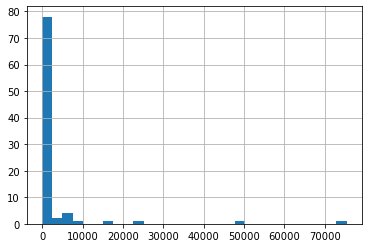

In [23]:
# посмотрим как часто пользователи ставят оценки
movies_tags_ratings.groupby(['userId_x', 'month']).rating.count().hist(bins=30)

In [24]:
movies_tags_ratings.groupby(['userId_x', 'month']).rating.count().median()

163.0

In [25]:
# медианное среднеквадратичное отклонениие по пользователю
movies_tags_ratings.groupby(['userId_x', 'month']).rating.std().median()

0.8970035588643919

In [26]:
movies_tags_ratings.groupby(['userId_x', 'day']).rating.count().median()

114.0

In [27]:
movies_tags_ratings.groupby(['userId_x', 'month']).rating.count().mean()

2620.370786516854

In [28]:
movies_tags_ratings.groupby(['userId_x', 'day']).rating.count().mean()

1554.7533333333333

Видим, что медиана и среднее очень сильно отличаются, выкинем наши выбросы

In [29]:
movies_tags_ratings.describe()

,movieId,userId_x,year,month,day,userId_y,rating
count,233213.000000,233213.000000,233213.000000,233213.000000,233213.000000,233213.000000,233213.000000
mean,12319.999443,470.683564,2013.563296,4.288127,17.292724,309.688191,3.966535
std,28243.919401,153.329632,4.727694,2.366976,8.408433,178.206387,0.968637
min,1.000000,2.000000,2006.000000,1.000000,1.000000,1.000000,0.500000
25%,296.000000,424.000000,2009.000000,2.000000,13.000000,156.000000,3.500000
50%,1198.000000,477.000000,2016.000000,5.000000,17.000000,309.000000,4.000000
75%,4638.000000,599.000000,2017.000000,6.000000,26.000000,460.000000,5.000000
max,193565.000000,610.000000,2018.000000,12.000000,31.000000,610.000000,5.000000


In [30]:
movies_tags_ratings['rat_of_month'] = movies_tags_ratings.groupby(['userId_x', 'month']).rating.count().reset_index().iloc[:,2] # добавим кол-во оценок по пользователям и месяцам в наш дф
movies_tags_ratings.head()

,movieId,title,genres,list_genres,userId_x,tag,date,year,month,day,userId_y,rating,rat_of_month
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,2006-02-04 09:36:04,2006,2,4,1,4.0,279.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,2006-02-04 09:36:04,2006,2,4,5,4.0,107.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,2006-02-04 09:36:04,2006,2,4,7,4.5,94.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,2006-02-04 09:36:04,2006,2,4,15,2.5,77.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure Animation Children Comedy Fantasy,336,pixar,2006-02-04 09:36:04,2006,2,4,17,4.5,258.0


In [31]:
# перезапишем наш дф, порог возьмем четь выше меддианы, т е удалим наши выбросы
movies_tags_ratings = movies_tags_ratings[movies_tags_ratings['rating'] < 180]

In [32]:
# посмотрим средние оценки по каждому фильму
movies_tags_ratings.groupby('movieId').rating.mean()

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
7         3.185185
            ...   
183611    4.000000
184471    2.500000
187593    3.875000
187595    3.900000
193565    3.500000
Name: rating, Length: 1554, dtype: float64

In [33]:
# по всем фильмам 
movies_tags_ratings.groupby('movieId').rating.mean().mean()

3.6523608566101737

In [34]:
movies_tags_ratings.groupby('movieId').rating.max().max()# видим, что тут все ок, выбросов нет

5.0

In [35]:
movies_tags_ratings.groupby('movieId').rating.min().min()

0.5

In [36]:
movies_tags_ratings.groupby('movieId').rating.std().mean() # среднее среднеквадратичное отконение по оценкам фильмов

0.7892508400524886

Оценить RMSE на тестовой выборке

In [37]:
predicted_y = lr.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y_test, predicted_y))

1.0697784876205194

In [41]:
predicted_y2 = lr.predict(X_test2)

In [43]:
sqrt(mean_squared_error(y_test2, predicted_y2))

0.9316383861048696